# CONSTRAINED OPTIMIZATION & THE KKT CONDITIONS

## Problem description
We are given a dataset of N points in $R^{2}$, namely $(x_{1}, y_{1}),(x_{2}, y_{2}),. . .,(x_{N}, y_{N})$. This assignment will look at finding lines of best fit for these points by solving various optimization problems. We seek to find a line of the form:
$$y = theta_{1} \times x + 	heta_{2}$$

that best fits our given data. Defining a parameter vector:
$$\Theta=\left[\begin{matrix}\theta_1\\\theta_2\end{matrix}\right]$$

and the data vectors by:
$$X=\left[\begin{matrix}x_1&1\\x_2&1\\x_N&1\end{matrix}\right]\ \ \ \ \ \ Y=\left[\begin{matrix}y_1\\y_2\\y_N\end{matrix}\right]$$

the fit discrepancy between the line and the data can be expressed compactly by the vector:
$$Y-X\Theta\ $$

The classic method to fit this data is by using a least-squares estimator, where we compute the parameters to solve
$$\min\parallel Y-X\Theta\parallel_2$$

In this case, an analytical solution can be found, since the optimization problem is unconstrained:
$$\Theta^{\circ}=\left(X^TX\right)^{-1}X^TY$$

However, the least-squares estimator can be influenced unduly by outlying datapoints.
We can also consider two other measures of discrepancy that may provide a more robust fit. The $l_{1}$-norm cost:
$$\min\parallel Y-X\Theta\parallel_1$$

penalizes the total absolute value of the deviation of all datapoints from the line of best fit, whereas the $l_{∞}$-norm cost:
$$\min\parallel Y-X\Theta\parallel_{\infty}$$

penalizes the maximum deviation over all datapoints. Both of these problems can be expressed as linear programs. In this assignment, we will first investigate the nature of solutions to LPs in general, and then solve these two minimization problems for a synthetic dataset.

## Assignment

- A linear program can be written in the form:
$$\min\left[c^Tx\right]$$
subject to:
$$Ax\le b\ \ \ \ \ \rightarrow\ \ \ \ \ Ax-b\le0$$
for matrices $A ∈ R^{m×n}$, $b ∈ R^{m×1}$ and $c ∈ R^{n×1}$. 

Given a vector $\lambda ∈ R^{n×1}$, the Langragian of the LP is written as:
$$\mathcal{L}(x,\lambda)=c^Tx+\lambda^T\left(Ax-b\right)$$
- For $x^{\ast}$ to be a local minimum  there exists a unique $λ^{\ast}$ s.t., the KKT conditions are:
    - Stationarity: $∇_x\mathcal{L}(x^{\ast},\ λ^{\ast})=0 \ \rightarrow \ \nabla c^Tx^{\ast}+\left(\lambda^{\ast}\right)^T\nabla\left(Ax^{\ast}-b\right)=0$ 
    - Complemantary slackness: $\left(λ^{\ast}\right)^T\left(Ax^{\ast}-b\right)=0$
    - Primal feasibility: $Ax^{\ast}-b\le0$
    - Dual feasibility: $λ^{\ast}\ge0$

Complimentary slackness condition presents two cases:
- $\lambda^{\ast} > 0 \rightarrow$ the optimum would lie on the border of the feasible set since the constraint is active 
$$Ax^{\ast}-b=0 \ \rightarrow \ Ax^{\ast}=b$$


- $\lambda^{\ast} = 0 \rightarrow$ which implies that the condition is inactive at the optimum. In such a case, the stationarity condition would be written as: $$\nabla c^Tx^{\ast}=0 \ \rightarrow \ c^T=0$$
The problem is equivalent to an unconstrained optimization and the optimum lies interior of the feasible set. In general, constraints are supposed to push the optimum away from the optimal value of the unconstrained objective function. Therefore, we would expect $\lambda^{\ast} > 0$


- *Explain why the optimal solution will in general never be found in the interior of the feasible region and will always be on a vertex or facet (the higher-dimentional equivalent of a face). You may find it insightful to write out the individual constraints row-by-row, each with its own multiplier to demonstrate this.*


$L_{1}$ norm: coresponding to the Manhattan distance which translate the problem into minimizing the sum of the absolute values as follow:
$$\min\parallel Y-X\Theta\parallel_1 \ \rightarrow \ \min\sum_{i=1}^N\mid Y_i-X_i\Theta\mid$$
Introducing a slack variable will serve as a boundary for the absolute value. The problem then can be rewritten as:
$$\forall s_i\ge0:\ \min\sum_{i=1}^Ns_i$$
$$\text{s.t} \ \ \ -s_i\le\mid Y_i-X_i\Theta\mid\le s_i$$\
The LP form would be:\
$\text{objective}\ \ \ \ \ \ \ \min \ 1^Ts_{i}$\
$\text{subject to} \ \ \ \ \ \ X_i\Theta-Y_i-s_i\le0$\
$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ Y_i-X_i\Theta-s_i\le0$

The smaller the value of the slack variable $s_{i}$, the tightest the interval between $-s_{i}$ and $s_{i}$ which would then minimize the value $\mid Y_i-X_i\Theta \mid $. The problem still an LP form but with two inequality constraints.


$L_{\infty}$ norm: coresponds to finding the maximum of the absolute values of $\mid Y-X\Theta\mid$ such as:
$$\min\parallel Y-X\Theta\parallel_{\infty} \iff \max\left\{\mid Y_1-X_1\Theta\mid,\mid Y_2-X_2\Theta\mid,\ ..\ ,\mid Y_N-X_N\Theta\mid\right\}$$

Using a variable to bound the greatest absolute value would transform the problem to be written as:
$$\min \ s$$
$$\text{s.t} \ \ \ \forall i \ \ \ -1^Ts\le\mid Y_i-X_i\Theta\mid\le 1^Ts$$\
The LP form would be:\
$\text{objective}\ \ \ \ \ \ \ \min \ s$\
$\text{subject to} \ \ \ \ \ \ X_i\Theta-Y_i-1^Ts\le0$\
$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ Y_i-X_i\Theta-1^Ts\le0$

## Regression $l_1$ and $l_\infty$

Some code is given below to generate a synthetic dataset.  Using CVX, solve two linear programs for computing the regression line for $l_1$ and $l_\infty$ regression.  Plot the lines over the data to evaluate the fit.

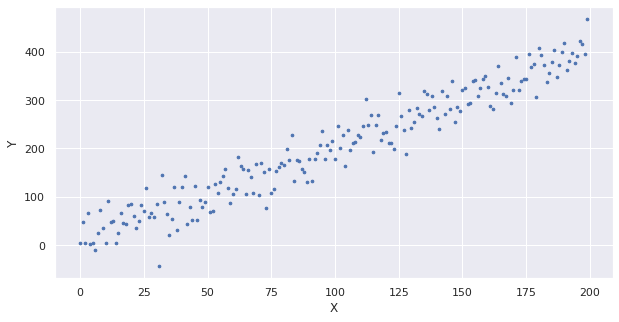

In [2]:
# l_1 and l_∞ regression using cvxpy
import numpy as np
import cvxpy as cvx
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# Generate a synthetic dataset

# Actual parameter values
theta1_act = 2
theta2_act = 5

# Number of points in dataset
N = 200

# Noise magnitude
mag = 30

# Datapoints
x = np.arange(0, N)
y = theta1_act * x + theta2_act *np.ones([1, N]) + np.random.normal(0, mag, N)

# Scatter plot of data
plt.figure(figsize=(10, 5))
plt.scatter(x, y, s=7); plt.xlabel('X'); plt.ylabel('Y')
plt.show()

In [0]:
def plot_fit(x, y, theta, norm):
    plt.figure(figsize=(10, 5))
    slope, intercept = theta.value[0][0], theta.value[1][0]
    line = lambda k: k * slope + intercept
    plt.title('Least-error line with {}-norm'.format(norm), fontsize=20)
    plt.scatter(x, y, s=7); plt.xlabel('X'); plt.ylabel('Y')
    plt.plot(x, line(x), color='red', linewidth=.5)

## $L_{1}$ norm

In [4]:
theta_1 = cvx.Variable(shape=(2, 1))

Y = y.T
X = np.column_stack((x, np.ones(N)))
S = cvx.Variable(shape=(N, 1))

objective_1 = cvx.Minimize(cvx.atoms.norm1(S))
constraints = [Y - X @ theta_1 >= -S, Y - X @ theta_1 <= S]
problem_1 = cvx.Problem(objective_1, constraints)
optimal_1 = problem_1.solve(verbose=False) # True
print('Optimal value: ', round(optimal_1, 5), 
      '\nLine slope:', round(theta_1.value[0][0], 5),
      '\nIntercept:', round(theta_1.value[1][0], 5)) 

Optimal value:  4820.12001 
Line slope: 1.95101 
Intercept: 9.13685


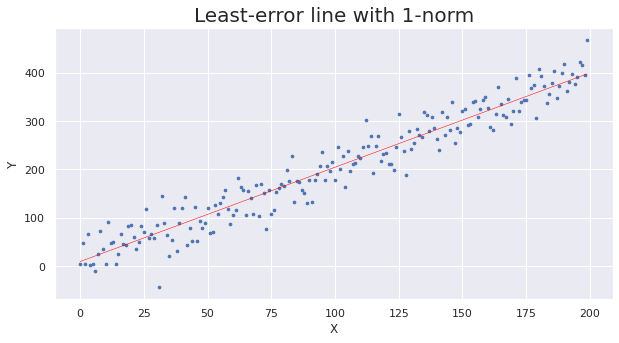

In [5]:
plot_fit(x, y, theta_1, 1)

## $L_\infty$ norm

In [6]:
theta_inf = cvx.Variable(shape=(2, 1))

Y = y.T
X = np.column_stack((x, np.ones(N)))

objective_inf = cvx.Minimize(cvx.atoms.norm_inf(Y - X * theta_inf))
problem_inf = cvx.Problem(objective_inf)
optimal_inf = problem_inf.solve()
print('Optimal value: ', round(optimal_inf, 5), 
      '\nLine slope:', round(theta_inf.value[0][0], 5),
      '\nIntercept:', round(theta_inf.value[1][0], 5))

Optimal value:  93.28316 
Line slope: 2.36313 
Intercept: -23.34792


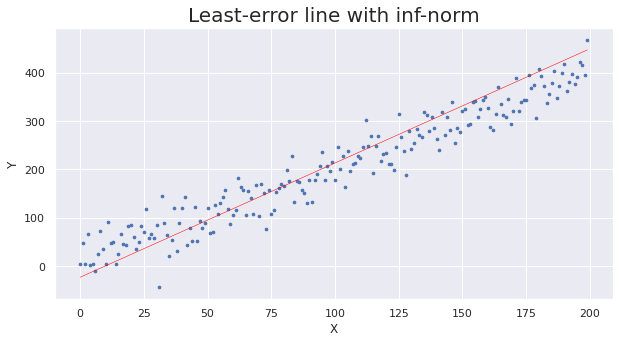

In [7]:
plot_fit(x, y, theta_inf, np.inf)

### Extension part

In [0]:
# what if we capture the optimal value as we change the norm [Minkowski distance]
def norm_regression(N, x_values, y_values, norm):
    theta = cvx.Variable(shape=(2, 1))
    Y = y_values.T
    X = np.column_stack((x_values, np.ones(N)))
    S = cvx.Variable(shape=(N, 1))

    if norm==1: objective = cvx.Minimize(cvx.atoms.norm1(S))
    else: objective = cvx.Minimize(cvx.atoms.Pnorm(S, p=norm))
    constraints = [Y - X @ theta >= -S, Y - X @ theta <= S]
    problem = cvx.Problem(objective, constraints)

    return problem.solve(), theta.value[0][0], theta.value[1][0]

In [0]:
norm_optimality = []
for _ in range(1, 21):
    norm_optimality.append(norm_regression(200, x, y, _))

In [10]:
import pandas as pd
norm_optimality = pd.DataFrame(norm_optimality, columns=['Optimal value', 'Slope', 'Intercept'])
norm_optimality.index += 1
norm_optimality.head(10)

,Optimal value,Slope,Intercept
1,4820.120007,1.951006,9.136853
2,430.561084,1.968524,7.527359
3,209.677544,1.980097,5.906714
4,153.390761,1.999338,3.172261
5,130.849820,2.024193,-0.241882
6,119.606653,2.049113,-3.609517
7,113.124618,2.070217,-6.442469
8,108.984011,2.086679,-8.648076
9,106.142374,2.099135,-10.321503
10,104.090373,2.108482,-11.588568


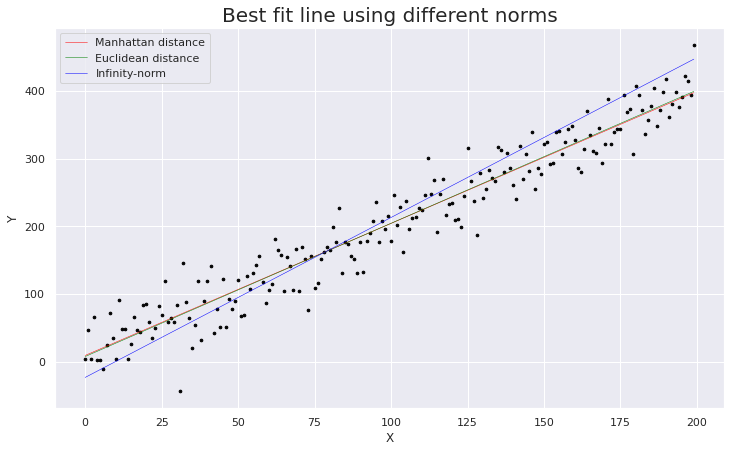

In [13]:
# Plotting the 1-norm, 2-norm, and infinity-norm 
plt.figure(figsize=(12, 7))
plt.scatter(x, y, s=7, color='black')

line_1 = lambda k: k * norm_optimality['Slope'][1] + norm_optimality['Intercept'][1]
line_2 = lambda k: k * norm_optimality['Slope'][2] + norm_optimality['Intercept'][2]
line_inf = lambda k: k * theta_inf.value[0][0] + theta_inf.value[1][0]

plt.plot(x, line_1(x), color='red', linewidth=.5, label='Manhattan distance')
plt.plot(x, line_2(x), color='green', linewidth=.5, label='Euclidean distance')
plt.plot(x, line_inf(x), color='blue', linewidth=.5, label='Infinity-norm')
plt.legend(); plt.xlabel('X'); plt.ylabel('Y')
plt.title('Best fit line using different norms', fontsize=20)
plt.show()

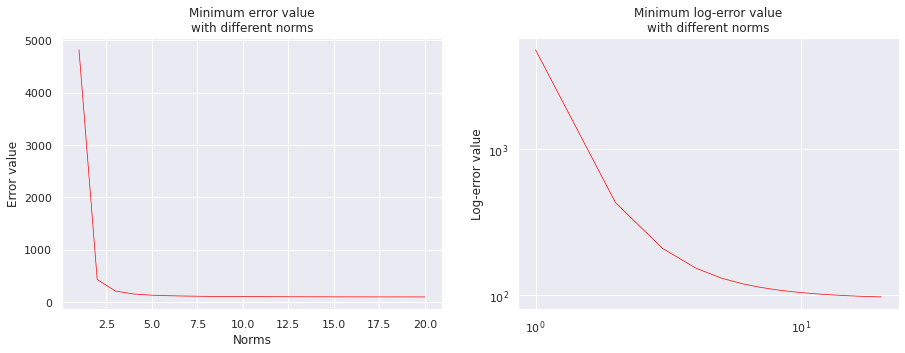

In [12]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.title('Minimum error value\nwith different norms')
plt.xlabel('Norms'); plt.ylabel('Error value')
plt.plot(list(range(1, 21)), norm_optimality['Optimal value'], 
         linewidth=.7, color='red')
plt.subplot(1,2,2)
plt.title('Minimum log-error value\nwith different norms')
plt.ylabel('Log-error value')
plt.loglog(list(range(1, 21)), norm_optimality['Optimal value'], 
             linewidth=.7, color='red')
plt.show()

## References
- Boyd, S., & Vandenberghe, L. (2015). Convex optimization. Cambridge: Cambridge University Press. Retrieved from: https://course-resources.minerva.kgi.edu/uploaded_files/mke/YDzxkr/boyd2004-cvx.pdf
- Calafiore, G., & Ghaoui, L. E. (2014).Optimzation models. Cambridge: Cambridge. Retrieved from: https://vel.life/%E5%87%B8%E4%BC%98%E5%8C%96/Optimization.Models.pdf